# **PA 01: k-NN Classification** 

### Instructions


*   The aim of this assignment is to give you hands-on experience with a real-life
machine learning application.
*   You will be implementing a kNN-based digit classifier.
*   You must use the Python programming language.
*   Please use procedural programming style and comment your code thoroughly.
*   There are two parts of this assignment. In part 1, you can use **NumPy**, **Pandas**, **Matplotlib**, **Seaborn**, and any other standard Python libraries. You are $\color{red}{\text{not allowed}}$ to use **scikit-learn**, or any other machine learning toolkit. You can only use **scikit-learn** in part 2.
*   **Carefully read the submission instructions and plagiarism policy.**

### Submission Instructions

You should submit both your notebook file (.ipynb) and python script (.py) on LMS.
Please name your files Name_RollNo_Assignment1. Zip these files in a folder and name
the folder Name_RollNo_Assignment1. If you don't know how to save .ipynb as .py see
[this](https://i.stack.imgur.com/L1rQH.png). Failing to submit any one of them might result in the reduction of marks.

### Plagiarism Policy

The code $\color{red}{\text{MUST}}$ be done independently. Any plagiarism or cheating of work from others
or the internet will be immediately referred to the DC. If you are confused about what
constitutes plagiarism, it is your responsibility to consult with the instructor or the TA
in a timely manner. **PLEASE DO NOT LOOK AT ANYONE ELSE'S CODE
NOR DISCUSS IT WITH THEM.**

### Introduction

The purpose of this assignment is to get you familiar with the k nearest neighbor classification. You will be training a k-NN model and using it to classify images of handwritten digits from the famous **MNIST dataset**, which contains 70,000
images of digits and their respective labels. You will first implement the code from scratch and then replicate the entire code using the scikit-learn library.

## **Part 1: Implement from Scratch (75 marks)**

You are not allowed to use scikit-learn or any other machine learning toolkit for this
part. You have to implement your own k-NN classifier from scratch. You may use
Pandas, NumPy, Matplotlib, Seaborn, and other standard Python libraries.

### Importing Libraries

In [1]:
# Importing relevant libraries. You may add other libraries if needed (except scikit-learn or any other machine learning toolkit)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from PIL import Image
import statistics 

### Loading Dataset

The MNIST dataset consists of 70,000 labelled images of handwritten digits, each of size 28 pixels by 28 pixels. 

The dataset given to you is in a CSV file. The CSV file has 70,001 rows and 785 columns. Each row represents one image of a handwritten digit.
The first row indicates what each column means (Print the loaded dataset to understand this). You should remove this row when creating the dataset. 
The first column gives the label (a number from 0 to 9). The next 784 columns give the value of each pixel. There are 784 pixels in each image corresponding to an image size of 28 by 28.

You can use the Pandas library to load the CSV file but the final dataset should be stored in a Numpy array of shape (70000, 785).

In [2]:
# Mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load the dataset from the folder on Drive where you have saved the dataset. Path will be like "/content/drive/..." 

#########################

# Enter your code here
df = pd.read_csv('/content/drive/My Drive/Fall2022-2023/CS535ML/PA1/mnist_digit/mnist.csv')
df = df.drop(index = df.index[0], axis = 0)
dataset = np.array(df).astype(np.uint8)
# print(type(dataset))
# print(dataset)
#########################

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,2

In [4]:
# Implement a function to display an image from your loaded dataset given the image index. 
# You can use the Pillow library for this purpose.
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

def display_image(image_ind):
  #pass # Enter your code here
  i = dataset[image_ind]
  i = i[1:]
  i = i.reshape(28,28)
  i=Image.fromarray(i)
  i.show()
  display(i)

In [5]:
# Now you can display different images to visualize them
display_image(3)

Now divide the dataset into training and test sets (around an 85-15 split).
More precisely, take the first 60,000 images for the training set and the last 10,000 for the test set.

Both the resulting splits/sets should be stored in Numpy arrays of shape (num_split_images, 785).
Depending on your approach, you can also separate the labels into a different array (or two arrays).

In [6]:
# Train-test split

#########################
# Enter your code here
def getLabel (arr):
  return arr[0]

def getSet (arr):
  return arr[1:]

#sample 20% of the dataset. 
twentyPercent = int(0.2 * len(dataset))
sampleDataset = dataset[0:twentyPercent] #20% of whole dataset.

#test/train split. 
percent85 = int(0.85 * len(sampleDataset))
trainS = sampleDataset[0:percent85]
testS = sampleDataset[percent85: len(sampleDataset)]

trainLabel = []
train = []
for i in range(len(trainS)):
    trainLabel.append(getLabel(trainS[i]))
    train.append(getSet(trainS[i]))

testLabel = []
test = []
for i in range(len(testS)):
    testLabel.append(getLabel(testS[i]))
    test.append(getSet(testS[i]))


# print(test.shape, train.shape)
#########################

### Implementing k-NN Classifier

Now you need to implement all of the tasks that follow.

First, implement separate functions for the Euclidean and Manhattan distances. Formulas for both are given below.

**Euclidean Distance:**

$$
d(\vec{p},\vec{q}) = \sqrt{(p_1 - q_1)^2 + (p_2 - q_2)^2 + (p_3 - q_3)^2 + ... + (p_n - q_n)^2}
$$

**Manhattan Distance:**

$$
d(\vec{p},\vec{q}) = |(p_1 - q_1)| + |(p_2 - q_2)| + |(p_3 - q_3)| + ... + |(p_n - q_n)|
$$

In [ ]:
# Implement functions for Euclidean and Manhattan distances

#########################

# Enter your code here
def euclideanDist (p, q): #n dimensional arrays p & q. 
  # if (len(p) == len(q)): 
  #   edist = 0 
  #   for i in range(len(p)):
  #     edist = edist + (int(p[i]) - int(q[i]))**2
  #   dist = edist**0.5 #square root
    return np.sqrt(np.sum((p-q) **2)) 

def manhattanDist (p,q):
  # if (len(p) == len(q)): 
  #   edist = 0 
  #   for i in range(len(p)): 
  #     edist = edist + abs(int(p[i]) - int(q[i]))
    return np.sum(abs(p-q)) 



# p = [1,2,3,4]
# q = [7,8,9,10]
# print(euclideanDist(p,q))
# print(manhattanDist(p,q))

#########################

Next, create your own k-Nearest Neighbors classifier function by performing the following
tasks:
1. For a test data point, find its distance from all training
instances.
2. Sort the calculated distances in ascending order based on distance values.
3. Choose k training samples with minimum distances from the test data point.
4. Return the most frequent class of these samples. (Your function should work
with Euclidean distance as well as Manhattan distance. Pass the distance
metric as a parameter in the k-NN classifier function. Your function should
also be general enough to work with any value of k.)

For values of k where a tie occurs, you need to break the tie by backing off to the k-1 value. In case there is still a tie, you will continue decreasing k until there is a clear winner.

In [ ]:
# Implement k-Nearest Neighbors classifier function
# Feel free to make any helper functions to assist you and to make the code modular

#########################
# Enter your code here
import statistics
from collections import Counter
from itertools import groupby

def mMode(arr): 
  #get (multi)mode.
  if (len(arr) > 0):
    
    freqs = Counter(arr).most_common()
    #print(freqs)
    count = [] #get list of counts only.
    for i in range(len(freqs)):
      item = freqs[i]
      count.append(item[1]) 
    occurances = np.unique(count)
    occurances = sorted(occurances, reverse = True) #the first value is the highest occuring mode. 
    # print("occurances",  occurances)
    mode = []
    for i in range(len(freqs)):
      item = freqs[i]
      if (item[1] ==  occurances[0]):
        mode.append(item[0])
    return mode 

def sortDistances(dMetric, train, trainL, testPoint):
  d = {} #dictionary for all distances. 
  for i in range(len(train)):
    if dMetric == 'Euclidean':
      # print("train[i]: ", train[i], "testPoint: ", testPoint)
      distance = euclideanDist(train[i], testPoint)
      # print("distance: ", distance)
    elif dMetric == 'Manhattan':
     distance = manhattanDist(train[i], testPoint)

    d[distance] = trainL[i] #key = distance. value = label. 

  sort = dict(sorted(d.items(),key=lambda item:item[0])) #sort distances by key. 
  values = list(sort.values())
  return values 

# dic = sortDistances("Euclidean",  train, trainLabel, test[0])
# print(dic)


def knn(dMetric, k, train, trainL, testPoint):
  d = sortDistances(dMetric, train, trainL, testPoint) #get list with labels
                                                       #we need to take first k values from the sorted list.
  singleMode = True
  while (singleMode):  
    labels = d[0:k] #get first k labels from it.
                    #get mode of labels 

    final = mMode(labels)
    if (len(final) > 1 and k > 1): #more than one mode
        k = k - 1
    else: #only one mode
      singleMode = False
      break
  return final  


 
# d = distanceCalc(train, test[0]) #d is a dictionary. 
# print(testLabel[0])
# print(d)
# print('----------------------------------------------')
# for j in range(100):
#   i = knn('Euclidean', 1, train, trainLabel, test[j]) #returns a number. 
#   print("predicted: ", i)
#   print("actual: "  , testLabel[j])
# # print(mMode([1,2,3,3,1,2]))
#########################

Next, implement an evaluation function that calculates the **confusion matrix**, **classification accuracy** and **macro-average F1**
score of your classifier. The function should take as input the predicted labels and the true labels. 

We recommend that you do not use hard coding in this function. Try it at your own risk :p

In [ ]:
# Implement evaluation function

#########################

# Enter your code here

#since it is multiclass, we will have s * s matrix. 

def confusion (true, predicted):
  classNum = np.unique(true) 
  s = len(classNum) #s should be equal to 10. 
  confusion = np.zeros(shape=(s,s)) 
  for i in range(s):
    for j in range(s): 
      confusion[i][j] = np.sum( (predicted == classNum[j])  & (true == classNum[i]))
  return confusion 


def getFalse(i, arr): #false for one specific class only. 
  false = 0
  for j in range(len(arr)):
    if (j!= i): 
      false = false + arr[j]
  return false

def FNlist(arr, i): 
  false = []
  for j in range(len(arr)):
    false.append(arr[j][i])

  return false 

def macroF1 (TP, FP, FN): 
  f1 = 0
  for i in range(len(TP)):
    f1 = f1 +  ( (2 * TP[i]) / (2*TP[i] + FP[i] + FN[i]))
  ave = f1 / len(TP)
  return ave


def eval(true, predicted): #pass the labels for true and predicted
  conf = confusion (true, predicted) #returns confusion matrix. 
  #classification accuracy. 
  accuracy = []
  trueP = []
  trueN = []
  falsePos = []
  falseNeg = []
  classNum = len(np.unique(true))

  for i in range(classNum): #no of classes 
   TP = conf[i][i]  #true positive.
   total = conf.sum() 
   TN = 0
   falsePos.append(getFalse(i, conf[i]))
   falseNeg.append(getFalse(i, FNlist(conf, i)))

   #for true negative
   for j in range(classNum):
    #  print("first: i ", i, " j: ", j)
    for k in range(classNum):
        if j != i and k != i:
          if (j < j - 1):
            j = j + 1
          if (k < k - 1):
            k = k + 1  
          TN = TN + conf[j][k]
          #print("j: ", j, " k: ", k)
   a = (TP + TN) / total
   trueP.append(TP) #add true positives to true positive list.
   trueN.append(TN) #add true negatives to true negative list.

   accuracy.append((TP + TN)/total)  #accuracy is class accuracy. 

  averageAccuracy = sum(accuracy)/ len(accuracy) #average accuracy of all classes. 
  mF1 = macroF1(trueP, falsePos, falseNeg)
  total = [conf, averageAccuracy, mF1]

  return total 


# actual = [1,2,3,2,3,1,2,3,1,2,3,1]
# pred   = [1,2,3,1,1,3,2,1,3,2,2,1]
# m = confusion (actual, pred)
# # print(m)
# # print(FNlist(m,0))
# # print(m[1])
# c = eval(actual, pred)
# # print(c)

# c = confusion_matrix(actual, pred)
# print('Macro F1-score: ', f1_score(actual, pred, average='macro'))
# print('\nAccuracy: ', (accuracy_score(actual, pred)))

# print("C: ", c)

#########################

Next, implement a function that performs m-fold cross-validation on the training data for a specified value of k. (In cross-validation, you divide
the training data set into m parts. m-1 parts will be used for training and 1 part
will be used for validation. Then you will take a different part of your data as a
validation data set and train your algorithm on the rest of the data set.) 

The function should **return predicted labels for the entire training data** (size of list/array should be equal to the size of training dataset) for the specified value of k. This is the result of appending the predicted labels for each validation-train split into a single list/array. Make sure the order of the predicted labels matches the order of the training dataset, so that they may directly be passed to your evaluation function together with the actual labels.

In [ ]:
# Implement function to perform m-fold cross-validation

#########################

# Enter your code here
def mCrossValidation(m, k, originalData, originalLabels, dMetric): #input training data and it's labels.

  sec = int(len(originalData) / m ) #no of data points in each section
  folds = []
  foldsLabel = [] #list of lists. 
  # for i in range(0, m): #create folds 
  #   l = originalData[i : i + sec]
  #   label = originalLabels[i: i + sec]
  #   folds.append(l)
  #   foldsLabel.append(label)

  l = [originalData[i: i+sec]for i in range(m)]
  label = [originalLabels[i: i+sec]for i in range(m)]
  [folds.append(l[i])for i in range(m)]
  [foldsLabel.append(label[i])for i in range(m)]
  # # print(len(folds), len(folds[0]))

  predictedLabels = []

  for i in range(m):
    test = folds[i] 
    train = []
    trainLabels = []

    # testLables = foldsLabel[i]
    # for j in range(m):
    #   if (j != i):
    #     # train.append(folds[j])
    #     trainLabels.append(foldsLabel[j])

    [train.append(folds[j]) for j in range(m) if j !=i ]
    [trainLabels.append(folds[j]) for j in range(m) if j!= i]
    # print(len(train), len(train[0]))
    
    #we need to flatten train + trainLabel. 
    train = [item for sublist in train for item in sublist]
    # print(type(trainLabels[0]))
    ntrainLabels = [item for sublist in trainLabels for item in sublist]
    print("k: ", k, " m: ", m,  " i of m: ", i)
    if dMetric == "Euclidean":
      for i in range(len(test)):
        predictedLabels.append(knn('Euclidean', k, train, ntrainLabels, test[i]))
    elif dMetric == "Manhattan":
      for i in range(len(test)):
        predictedLabels.append(knn('Manhattan', k, train, ntrainLabels, test[i]))
   
  return predictedLabels  

#########################

Now run your
cross-validation function on the training data using m = 5 for the values of k = 1, 2, 3, 4, 5, 6, 7, 8, 9, 10. Do
this for both the Euclidean distance and the Manhattan distance for each value of
k. Also run your evaluation function for each value of k for both distance metrics and report confusion matrix, classification accuracy and F1 score.

Each confusion matrix must be displayed as a heatmap annotated with the data values. The axes should be properly labelled and the colormap used needs to be shown next to the heatmap.

In [ ]:
# Perform 5-fold cross-validation and report evaluation metrics

#########################

# Enter your code here
predictCrossEuclidean = []
predictCrossManhattan = []
evaluationEuclidean = []
evaluationManhattan = []

for i in range(1, 11):
  predictCrossEuclidean.append(mCrossValidation(5,i,train,trainLabel, 'Euclidean')) # mCrossValidation(m, k, originalData, originalLabels, dMetric)



#)########################

k:  1  m:  5  i of m:  0
val type: <class 'list'> <class 'list'>


TypeError: ignored

In [ ]:
import csv 
import pandas as pd
# tempList = [1,2,3,4,5,6,7,2,1,2,3,4,5,8,3,4,4]
df = pd.DataFrame(predictCrossEuclidean)
df.to_csv('euclidean.csv')
!cp euclidean.csv "drive/My Drive/" #save to google drive.

NameError: ignored

In [ ]:
for i in range(1, 11):
    predictCrossManhattan.append(mCrossValidation(5,i,train,trainLabel, 'Manhattan')) # mCrossValidation(m, k, originalData, originalLabels, dMetric)



In [ ]:
df = pd.DataFrame(predictCrossManhattan)
df.to_csv('manhattan.csv')
!cp euclidean.csv "drive/My Drive/" #save to google drive.

In [ ]:
print(len(predictCrossEuclidean[0]))

print(len(predictCrossManhattan))

print(len(train))

2380
0
11900


In [ ]:
for i in range(1,11):
  evaluationEuclidean.append(eval(trainLabel, predictCrossEuclidean[i]))
#   evaluationManhattan.append(eval(trainLabel, predictCrossManhattan))


ValueError: ignored

Next, present the results as a graph with k values on the x-axis and classification accuracy
on the y-axis. Use a single plot to compare the two versions of the classifier (one
using Euclidean and the other using Manhattan distance metric). Make another
graph but with the F1 score on the y-axis this time. The graphs should be properly
labeled.

In [ ]:
# Draw the required plots

#########################

# Enter your code here

#########################

Comment on the best value of k you have found for both distance metrics using
cross-validation. What impact does this value have on the decision boundries generated by the model and the stability of decisions?

In [ ]:
#########################

# Your response

#########################

Finally, use the best value of k for both distance metrics and run it on the test
dataset. Find the confusion matrix, classification accuracy and F1 score and print
them. Keep in mind the earlier instructions about displaying confusion matrices.

In [ ]:
# Use best values of k on test dataset

#########################

# Enter your code here

#########################

## **Part 2: Implement using Scikit-Learn (25 marks)**

In this part, you have to use [scikit-learn's k-NN implementation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) to train and test your
classifier on the dataset used in Part 1. Repeat the tasks you have done in Part 1
but this time using scikit-learn. Perform 5-fold cross-validation and run
the k-NN classifier for values of k = 1, 2, 3, 4, 5, 6, 7, 8, 9, 10 using both Euclidean
and Manhattan distance. Use scikit-learn's [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) function to calculate the
accuracy, [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) to calculate macro-average F1 score,
and [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) function to calculate confusion matrix from the predicted labels. Also present
the results as a graph with k values on the x-axis and performance measures on the y-axis
just like you did in Part 1. Use a single plot to compare the two versions of the classifier
(one using Euclidean and the other using Manhattan distance metric). Finally, print the
best values of k for both distance metrics. Then use these values of k on the test dataset and print the evaluation scores and confusion matrix for each of the distance metrics.

Note that the confusion matrices must be displayed in the same way as in Part 1.

In [7]:
#run 5-fold cross validation for k = 1 - 10 for both distance metrics. 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict

predEuc = []
predManhattan =[]
for i in range (1,11):
  knnEuc = KNeighborsClassifier(n_neighbors=i, p = 2, metric = 'minkowski') #euclidean 
  knnManhattan = KNeighborsClassifier(n_neighbors=i, p = 1, metric = 'minkowski') #manhattan
  predEuc.append(cross_val_predict(knnEuc, train, trainLabel, cv=5)) #5 fold 
  predManhattan.append(cross_val_predict(knnManhattan, train, trainLabel, cv=5))



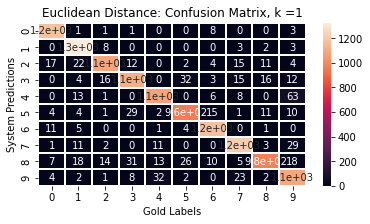

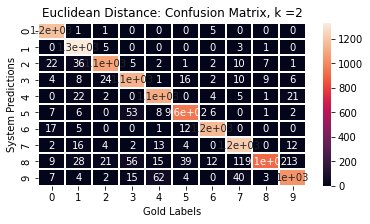

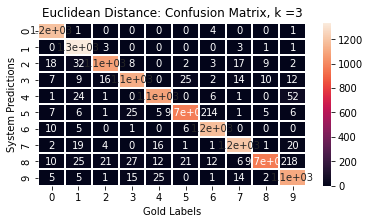

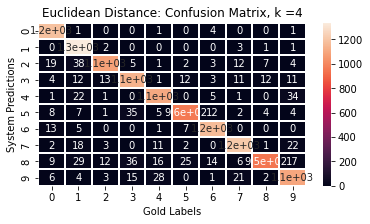

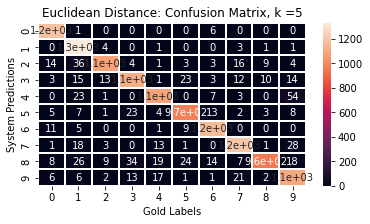

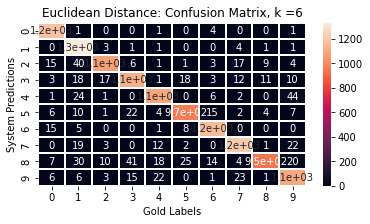

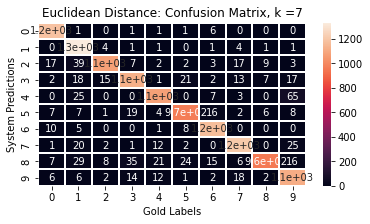

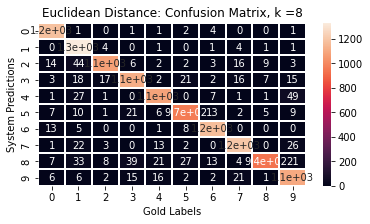

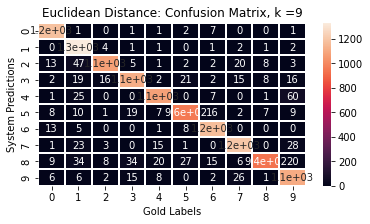

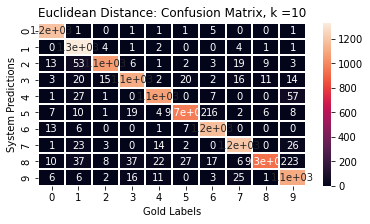

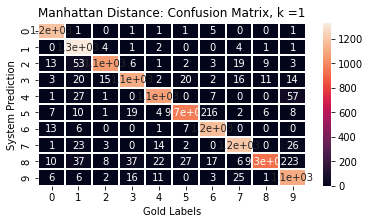

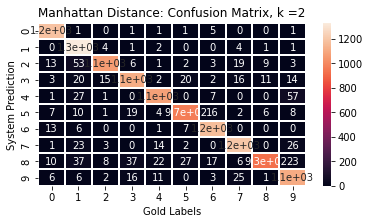

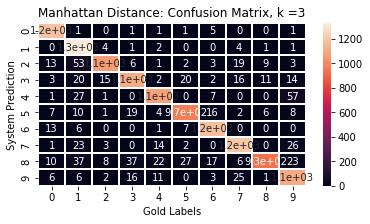

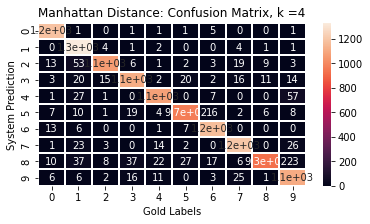

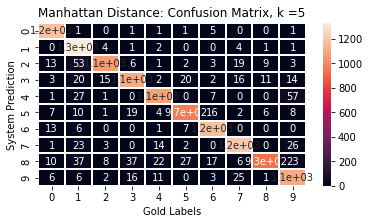

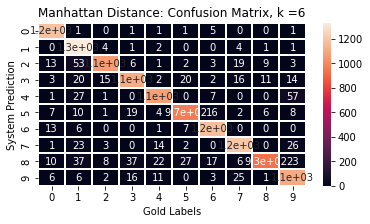

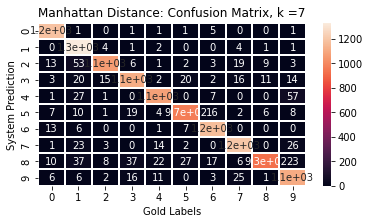

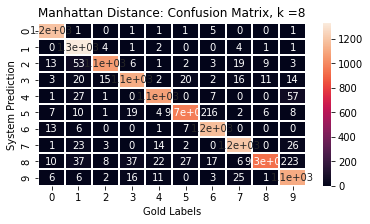

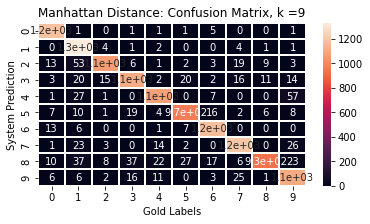

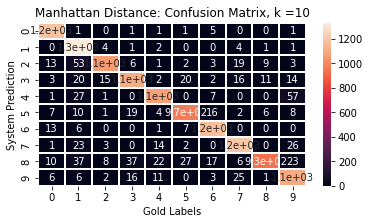

In [19]:
#the confusion matrix. 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
import seaborn as sns


for i in range(10):
  confusionE = confusion_matrix(trainLabel, predEuc[i]) 
  # print('Confusion Matrix', confusion)
  plt.figure(figsize=(6,3))
  heat_map = sns.heatmap(confusionE, linewidth = 1 , annot = True)
  st = "Euclidean Distance: Confusion Matrix, k =" +str(i+1)
  plt.title( st)
  plt.ylabel('System Predictions')
  plt.xlabel('Gold Labels')
  plt.show()


for i in range(10):
    confusionM = confusion_matrix(trainLabel, predManhattan[i])
    plt.figure(figsize=(6,3))
    heat_map = sns.heatmap(confusionE, linewidth = 1 , annot = True)
    st = "Manhattan Distance: Confusion Matrix, k =" + str(i+1)
    plt.title( st)
    plt.ylabel('System Prediction')
    plt.xlabel('Gold Labels')
    plt.show()


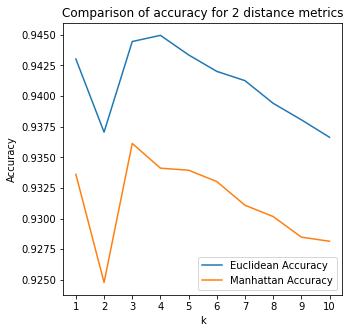

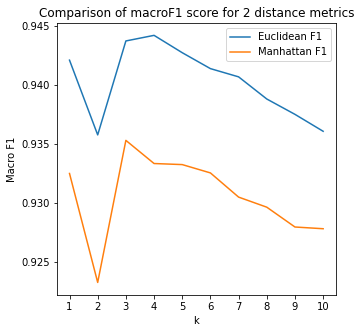

In [28]:
#accurcy, macroF1
accuracyM = []
macroF1M = []
accuracyE = []
macroF1E = []
for i in range(10):
  accuracyM.append(accuracy_score(trainLabel, predManhattan[i]))  
  macroF1M.append(f1_score(trainLabel, predManhattan[i], average='macro'))

  accuracyE.append(accuracy_score(trainLabel, predEuc[i]))  
  macroF1E.append(f1_score(trainLabel, predEuc[i], average='macro'))


#for accuracy. 
xAxis = [1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize=(5,5))
plt.plot(xAxis,accuracyE, label = "Euclidean Accuracy")
plt.plot(xAxis, accuracyM, label = "Manhattan Accuracy")
plt.title( "Comparison of accuracy for 2 distance metrics")
plt.ylabel('Accuracy')
plt.xlabel('k')
plt.legend()
plt.xticks(xAxis)
plt.show()


#for F1. 
plt.figure(figsize=(5,5))
plt.plot(xAxis,macroF1E, label = "Euclidean macroF1")
plt.plot(xAxis, macroF1M, label = "Manhattan macroF1")
plt.title( "Comparison of macroF1 score for 2 distance metrics")
plt.ylabel('Macro F1 score')
plt.xlabel('k')
plt.legend()
plt.xticks(xAxis)
plt.show()

Finally, print the
best values of k for both distance metrics. Then use these values of k on the test dataset and print the evaluation scores and confusion matrix for each of the distance metrics

Answer: The best value of k for both distances is k = 3. 

In [29]:
# k = 3

knnEuc = KNeighborsClassifier(n_neighbors=3, p = 2, metric = 'minkowski').fit(train, trainLabel) #euclidean 
knnManhattan = KNeighborsClassifier(n_neighbors=3, p = 1, metric = 'minkowski').fit(train, trainLabel) #manhattan

eucPred =knnEuc.predict(test)
manhPred=knnManhattan.predict(test)  #predicted outputs for both distances. 




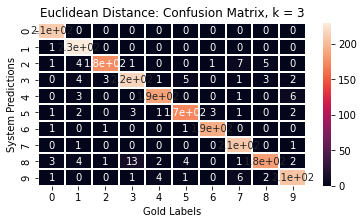

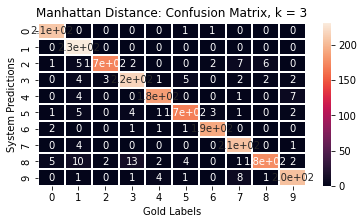

In [31]:
#evaluation matrix & confusion matrix. 
confusionE = confusion_matrix(testLabel, eucPred) 
plt.figure(figsize=(6,3))
heat_map = sns.heatmap(confusionE, linewidth = 1 , annot = True)
st = "Euclidean Distance: Confusion Matrix, k = 3" 
plt.title( st)
plt.ylabel('System Predictions')
plt.xlabel('Gold Labels')
plt.show()

confusionM = confusion_matrix(testLabel, manhPred) 
plt.figure(figsize=(6,3))
heat_map = sns.heatmap(confusionM, linewidth = 1 , annot = True)
st = "Manhattan Distance: Confusion Matrix, k = 3" 
plt.title( st)
plt.ylabel('System Predictions')
plt.xlabel('Gold Labels')
plt.show()




In [36]:


Eaccuracy= accuracy_score(testLabel, eucPred)  
EmacroF1= f1_score(testLabel, eucPred, average='macro')
print("Euclidean Distance:\n")
print("Accuracy: " ,Eaccuracy, "\nMacroF1 Score: ", EmacroF1)
Maccuracy = accuracy_score(testLabel, manhPred)
MmacroF1= f1_score(testLabel, manhPred, average='macro')
print("\n\nManhattan Distance:\n")
print("Accuracy: ", Maccuracy, "\nMacroF1 Score: ", MmacroF1)

Euclidean Distance:

Accuracy:  0.9466666666666667 
MacroF1 Score:  0.9466162976246254


Manhattan Distance:

Accuracy:  0.9342857142857143 
MacroF1 Score:  0.9342069633932907
